In [5]:
import pandas as pd
df = pd.read_csv("pca_transformed_output.csv")
df.head()


,PC1,PC2,PC3,PC4,PC5,label
0,-2.260593,-0.344510,-1.609809,-1.053710,0.947905,0
1,-0.133474,3.105938,1.462322,0.828849,-1.380897,0
2,-1.977600,-0.341556,-1.687737,-1.246947,1.309119,0
3,-1.479357,0.897614,-0.858482,1.035689,-0.989909,0
4,-1.680400,2.221787,-1.015449,2.698644,1.534467,1


In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv("pca_transformed_output.csv")

# Step 2: Split the data into features and target
# Assuming the last column is the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting of neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Step 5: Initialize the k-NN classifier
knn = KNeighborsClassifier()

# Step 6: Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, refit=True, verbose=2, cv=2)
grid_search.fit(X_train, y_train)

# Step 7: Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Step 8: Evaluate the model on the test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=7, weig

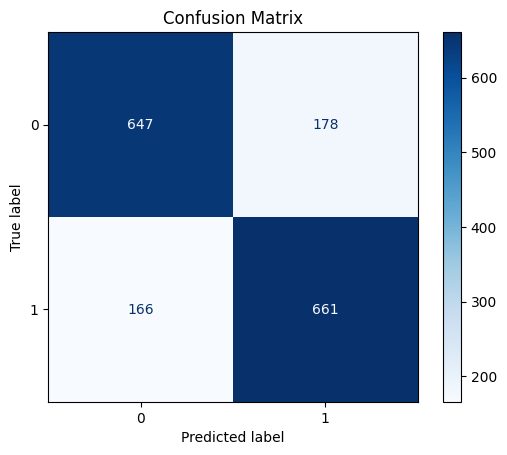

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 2: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
